## Introduction :
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Project Goal : 
1. Complete a project to add to a portfolio
2. Use Git version control
3. Use Jupyter Notebook to communicate findings
4. Run an end-to-end data science project
5. Become familiar with data science workflows

The objective of this project is to use the skills acquired so far in data science on code academy on a project to get a real idea of the work of a data scientist.
The main task in this project will be to predict the final price of each house based on the characteristics present in the data. 


## Data : 
In this project we will use data from one of the kaggle start prediction competitions.
The dataset used Ames Housing was compiled by Dean De Cock for use in teaching data science. It is an incredible alternative for data scientists looking for a modernised and extended version of the oft-cited Boston Housing dataset. 

## Analysis :
In this project, we will use descriptive statistics and data visualisation to get a summary description of our data, and as we are predicting house prices, we will use supervised learning algorithms such as regression.

## Evaluation : 
The project will end with the evaluation of the selected machine learning model with a validation dataset. The output of the predictions can be verified via a regression metric, the one we will choose is the r2 score.

## Import Python Modules

First import the modules being used for this project:

In [15]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\anaconda\lib\site-packages (0.11.1)


In [16]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## File descriptions
train.csv - the training set

test.csv - the test set

data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Loading the data : 


In [17]:
train_data = pd.read_csv("train.csv", encoding='utf-8')
test_data = pd.read_csv("test.csv", encoding='utf-8')
test_data.drop("Id", axis = 1, inplace = True)

# print("Test data : ")
# print(test_data.head(5))
train_data.drop("Id", axis = 1, inplace = True)
print("Train data : ")
print(f"{train_data.head(5)}")
X_train = train_data.iloc[:,:-1]
y_train = train_data.loc[:,"SalePrice"]
X_test = test_data



Train data : 
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         No

In [18]:
print("X_test : ")
print("{}".format(X_test.shape))

X_test : 
(1459, 79)


In [19]:
print("X_train : {}".format(X_train.shape))
print("y_train : {}".format(y_train.shape))

X_train : (1460, 79)
y_train : (1460,)


Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
rows, columns = train_data.shape
print("Rows : {}".format(rows))
print("Columns : {}".format(columns))

Rows : 1460
Columns : 80


In [22]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Explore the Data

In [44]:
#Quantitative variables 

# features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
#         'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
#         'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
#         'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
#         'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
#         'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
#         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
#         'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
#quantitative_features = X_train.select_dtypes(include=['float64','int64'])
quantitative_features = train_data.select_dtypes(include=['float64','int64'])
categorical_features = X_train.select_dtypes(include="object")
quantitative_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [40]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

**For the choice of our explanatory variables later we will use the pearson coefficient to see which variables are strongly related to our target variable, and for the categorical variables we will use side-by-side whisker boxes to see the relationships between these variables and our target variable.** 

In [24]:
correlation = quantitative_features.corr()
correlation["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### A small note on the pearson coefficient: 

Strongly correlated variables have a coefficient below -0.6 or above 0.6 .

Results between -0.6 and -0.3 or between 0.3 and 0.6 show a moderately strong relationship.

We will use the following quantitative variables: 

OverallQual      0.790982

GrLivArea        0.708624

GarageCars       0.640409

GarageArea       0.623431

TotalBsmtSF      0.613581

1stFlrSF         0.605852

FullBath         0.560664

TotRmsAbvGrd     0.533723

YearBuilt        0.522897

YearRemodAdd     0.507101


#### Graphical representation using seaborn scatter plots.

#### SalePrice VS OverrallQual

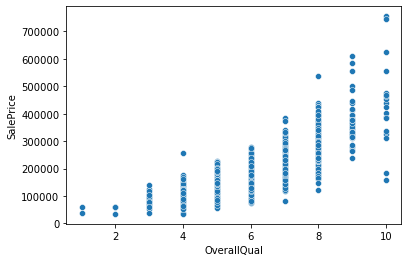

In [27]:
sns.scatterplot(data = train_data, x = "OverallQual", y = "SalePrice")

#### SalePrice VS GrLivArea 

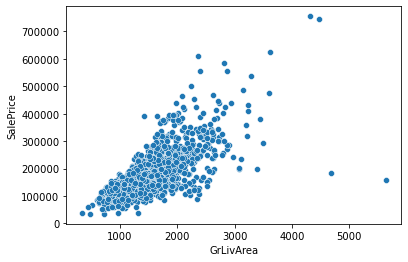

In [28]:
sns.scatterplot(data = train_data, x = "GrLivArea", y = "SalePrice")

#### SalePrice VS GarageCars

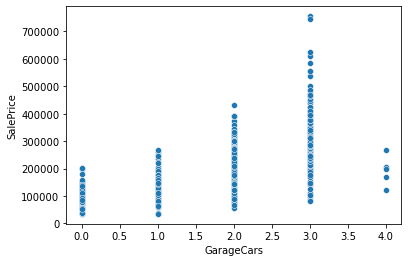

In [32]:
sns.scatterplot(data = train_data, x = "GarageCars", y = "SalePrice")

#### SalePrice VS GarageArea

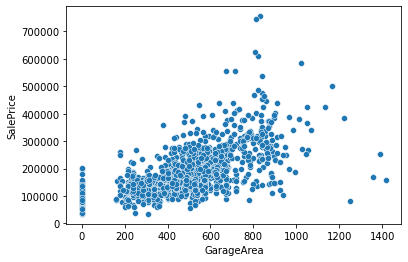

In [33]:
sns.scatterplot(data = train_data, x = "GarageArea", y = "SalePrice")

#### SalePrice VS TotalBsmtSF

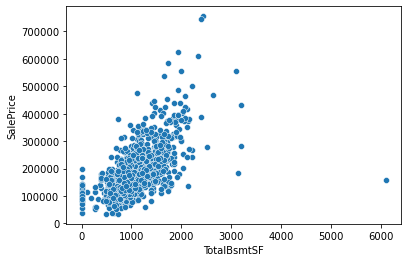

In [34]:
sns.scatterplot(data = train_data, x = "TotalBsmtSF", y = "SalePrice")

#### SalePrice VS 1stFlrSF

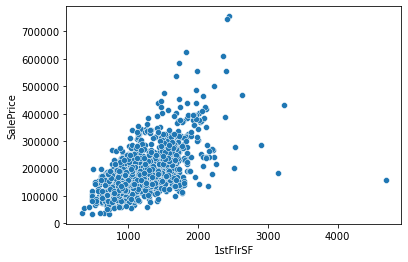

In [35]:
sns.scatterplot(data = train_data, x = "1stFlrSF", y = "SalePrice")

#### SalePrice VS FullBath

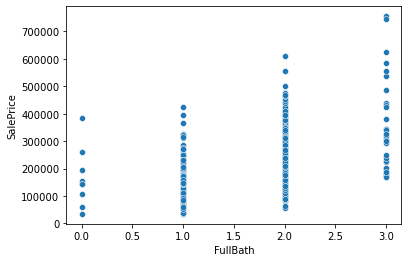

In [36]:
sns.scatterplot(data = train_data, x = "FullBath", y = "SalePrice")

#### SalePrice VS TotRmsAbvGrd

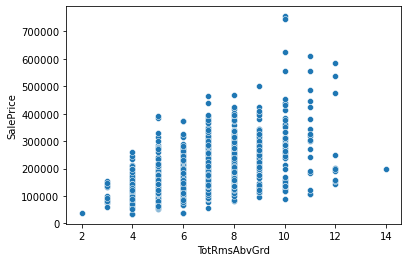

In [37]:
sns.scatterplot(data = train_data, x = "TotRmsAbvGrd", y = "SalePrice")

#### SalePrice VS YearBuilt

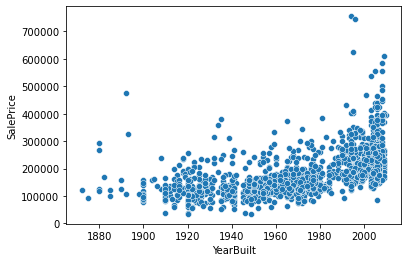

In [38]:
sns.scatterplot(data = train_data, x = "YearBuilt", y = "SalePrice")

#### SalePrice VS YearRemodAdd

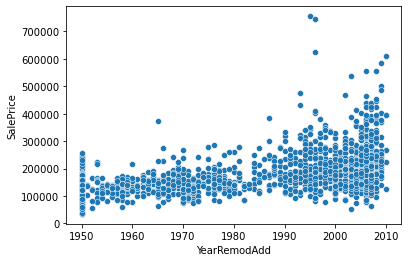

In [39]:
sns.scatterplot(data = train_data, x = "YearRemodAdd", y = "SalePrice")

## Data preparation

#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [62]:
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", 
"YearBuilt", "YearRemodAdd"]
print("Training set")
X_train[features].isnull().sum()
X_train = X_train[features]

Training set


In [63]:
print("Test data")
X_test[features].isnull().sum()

Test data


OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

### Preprocessing
Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others. 
The selected variables are those that are highly correlated with our target variable.

In [109]:
X_test = X_test[features].dropna()
X_test[features].isnull().sum()
X_test = X_test[features]

### Prediction 

#### model building 
In this project we will use multiple linear regression, as we are dealing with a regression problem with several independent variables.

We will also use decision trees to decide which algorithm to choose.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scale = StandardScaler()
lin_reg = LinearRegression()
scale.fit_transform(X_train)
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.7736928402773303

In [65]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_reg.score(X_train, y_train)

0.9998912655354057

**Random forests**

In [79]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.9796797981475729

**Let us now use cross-validation to see the generalisation performance of our model.**

**As the decision trees have the best score, we will use them for cross-validation.**

In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring="r2", cv=10)
scores

array([0.68946062, 0.76758597, 0.80055735, 0.46271026, 0.81743783,
       0.78420044, 0.77264524, 0.75765974, 0.74723905, 0.73364696])

In [94]:
print("Average Cross-Validation score : {:.2f}".format(scores.mean()))

Average Cross-Validation score : 0.73


**Let's use cross-validation for multiple regression as well.**

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train, scoring="r2", cv=10)
scores

array([0.8080895 , 0.82885095, 0.86340222, 0.71921662, 0.78563551,
       0.78140486, 0.77578427, 0.78025844, 0.5068414 , 0.82479478])

In [96]:
print("Average Cross-Validation score : {:.2f}".format(scores.mean()))

Average Cross-Validation score : 0.77


**Cross validation with Random forest**

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train, y_train, scoring="r2",cv=10)
scores

array([0.82044382, 0.85946557, 0.89075287, 0.63438088, 0.87347424,
       0.8807861 , 0.88556208, 0.87821344, 0.81315824, 0.84636738])

In [98]:
print("Average Cross-Validation score : {:.2f}".format(scores.mean()))

Average Cross-Validation score : 0.84


#### Random forests provide the best results, let's use GridSearchCV from Scikit-Learn to fine tune our model.

In [105]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='r2', refit = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='r2')

In [106]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [107]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [108]:
grid_search.score(X_train, y_train)

0.9777713919824712

#### Final Model

In [122]:
final_model = grid_search.best_estimator_ 
X_test = scale.transform(X_test)
final_predictions = final_model.predict(X_test)


In [126]:
final_predictions.mean()

45525.005513612436

### Conclusion: 
The objective of this project was to predict house prices according to certain characteristics. To achieve this we used our knowledge of data science and machine learning. It was an opportunity for us to acquire other skills (cross validation and grid search). These new skills allowed us to choose the best model (random forests), to improve them to obtain a result that is more than perfect.



### Next Steps :
Although the results are relatively good, it would be good to see if adding new variables could make our models perform better.